# -----------------------------------BACKGROUND---------------------------------------

# ------------------------------All NECESSARY IMPORTS-------------------------------

In [320]:
import csv
import pandas as pd
import numpy as np
from pandas import ExcelWriter
from pandas import ExcelFile
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# ---------------------------------READING THE DATA----------------------------------
## Importing data
Maintaining the original format of the data provided : Importing the data in a single format was resulting 
into columns data being modified.

In [328]:
dd = pd.read_excel('/Users/sonalichaudhari/Desktop/Data Scientist Technical Assessment.xlsx', sheetname='DATA')
dd = dd[['series','network','Type','# Eps','Air Day','daypart', 'Unique HHs', 'Total Hrs Viewed','Avg % Viewed']]

df = pd.read_csv('/Users/sonalichaudhari/Desktop/DATA.csv')
df = df[['National Time','Run_time (min)']]

df = pd.concat([dd, df], axis=1)
df = df[['series','network','Type','# Eps','Air Day','National Time','Run_time (min)','daypart', 'Unique HHs', 'Total Hrs Viewed','Avg % Viewed']]
df['Avg % Viewed']= df['Avg % Viewed'].apply(lambda x: x*100)
df.head(3)

,series,network,Type,# Eps,Air Day,National Time,Run_time (min),daypart,Unique HHs,Total Hrs Viewed,Avg % Viewed
0,series19,network4,Broadcast,1,M,9:00 PM,177,prime,2006831,2.133483e+06,29.302215
1,series314,network5,Broadcast,3,M,8:00 PM,121,prime,4473165,4.094865e+06,39.750605
2,series314,network5,Broadcast,1,M,8:00 PM,91,prime,1221582,9.647431e+05,46.806646


# ------------------------- EXPLORATORY DATA ANALYSIS----------------------------
EDA is the practice of describing the data by means of statistical and visualization techniques to bring important aspects of that data into focus for further analysis.
## DATA OVERVIEW
Getting to know basic info of the data : datatypes, basic statistics 

In [329]:
print("Column List : ",df.columns.tolist())
print("\nNumber of rows:  ",df.shape[0])
print("Number of columns: ",df.shape[1])
print("\nCount of unique series: ", df['series'].nunique())
print("Count of unique network: ", df['network'].nunique())
print("Count of unique daypart: ", df['daypart'].nunique())
print("---------------------------------------------")
print(df.info())
print("---------------------------------------------")
df.describe()

Column List :  ['series', 'network', 'Type', '# Eps', 'Air Day', 'National Time', 'Run_time (min)', 'daypart', 'Unique HHs', 'Total Hrs Viewed', 'Avg % Viewed']

Number of rows:   3500
Number of columns:  11

Count of unique series:  1441
Count of unique network:  69
Count of unique daypart:  7
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 11 columns):
series              3500 non-null object
network             3500 non-null object
Type                3500 non-null object
# Eps               3500 non-null int64
Air Day             3500 non-null object
National Time       3500 non-null object
Run_time (min)      3500 non-null int64
daypart             3500 non-null object
Unique HHs          3500 non-null int64
Total Hrs Viewed    3500 non-null float64
Avg % Viewed        3500 non-null float64
dtypes: float64(2), int64(3), object(6)
memory usage: 300.9+ KB
None
--------------------------------

,# Eps,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed
count,3500.000000,3500.000000,3.500000e+03,3.500000e+03,3500.000000
mean,4.098857,65.612286,3.716375e+05,1.690007e+05,48.484527
std,5.664574,46.158192,7.660410e+05,4.385123e+05,16.596207
min,1.000000,2.000000,1.286500e+04,6.268061e+02,10.175968
25%,1.000000,30.000000,6.796900e+04,2.809981e+04,35.000000
50%,2.000000,60.000000,1.393025e+05,6.294667e+04,49.507509
75%,4.000000,90.000000,3.331402e+05,1.347992e+05,60.527679
max,28.000000,420.000000,1.478116e+07,1.155655e+07,98.369918


## VISUALISATIONS

### Check for outliers
Creating boxplots for numerical columns to see the distribution of the data and to look for outliers
Columns : 'Run_time(min)','Unique HHs', 'Total Hrs Viewed'

#### COLUMN  : Run_time(min)

After filtering the raw data for the threshold value 175 of Run_time
Number of rows consisting outliers:  120
The number of rows is very few as compared to the entire data, so we will reove those rows from the data


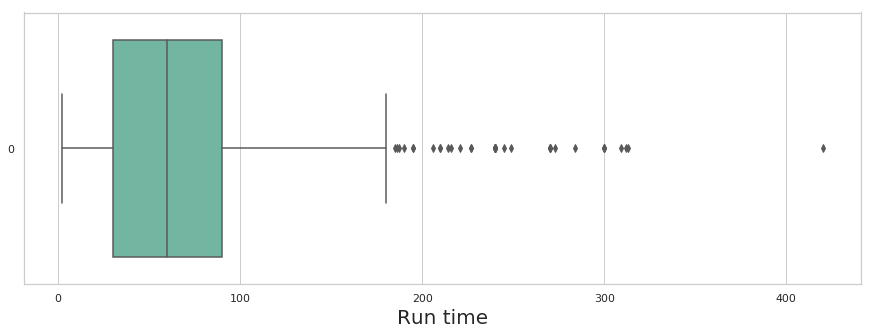

In [330]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=df['Run_time (min)'], orient="h", palette="Set2")
ax.set_xlabel('Run time', fontsize=20)
print("After filtering the raw data for the threshold value 175 of Run_time")
print("Number of rows consisting outliers: ",df[df['Run_time (min)']>=175].shape[0])
print("The number of rows is very few as compared to the entire data, so we will reove those rows from the data")

#### COLUMN  : Unique HHs

After filtering the raw data for the threshold value 700000 of Unique HHs
Number of rows consisting outliers:  435


count    3.500000e+03
mean     3.716375e+05
std      7.660410e+05
min      1.286500e+04
25%      6.796900e+04
50%      1.393025e+05
75%      3.331402e+05
max      1.478116e+07
Name: Unique HHs, dtype: float64

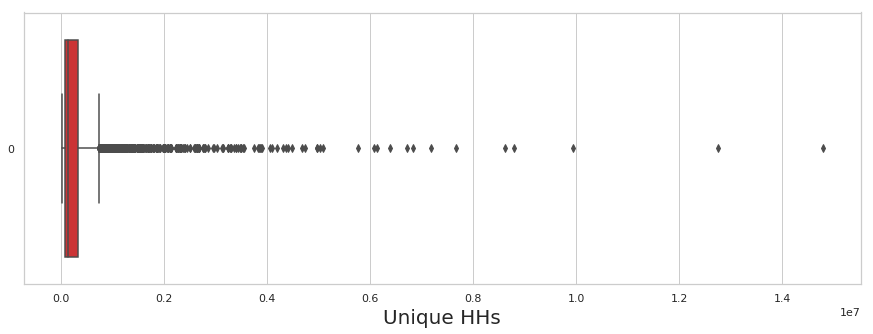

In [324]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=df['Unique HHs'], orient="h", palette="Set1")
ax.set_xlabel('Unique HHs', fontsize=20)
print("After filtering the raw data for the threshold value 700000 of Unique HHs")
print("Number of rows consisting outliers: ",df[df['Unique HHs']>=700000].shape[0])
df['Unique HHs'].describe()

#### COLUMN  : Total Hrs Viewed

After filtering the raw data for the threshold value 185 of Total Hrs Viewed
Number of rows consisting outliers:  31


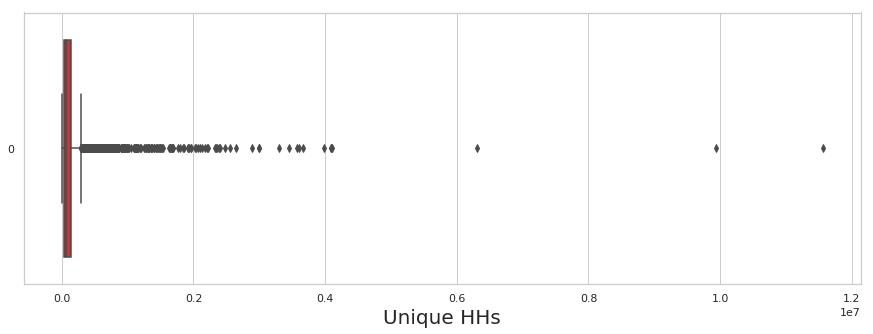

In [338]:
a4_dims = (15, 5)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.boxplot(data=df['Total Hrs Viewed'], orient="h", palette="Set1")
ax.set_xlabel('Unique HHs', fontsize=20)
print("After filtering the raw data for the threshold value 185 of Total Hrs Viewed")
print("Number of rows consisting outliers: ",df[df['Total Hrs Viewed']>=2000000].shape[0])

### Handling Outlier
Step: Removing all the rows consisting outliers mentioned above

In [339]:
df = df[~(df['Total Hrs Viewed']>2000000)]
df = df[~(df['Unique HHs']>700000)]
df = df[~(df['Run_time (min)']>175)]
df.shape

(2967, 11)

In [340]:
# plt.figure(figsize=(20,12), dpi=100)
# temp = df[['daypart','Avg % Viewed']].groupby(['daypart']).mean().reset_index()
# temp.plot(kind='bar')

# plt.xlabel('Day Part')
# plt.ylabel('APV %',size=22)
# plt.title('Audience Engagement based on Average % Viewed by part of the Day',size=22,color="black")
# plt.show()

### Audience Engagement based on Average % Viewed by part of the Day

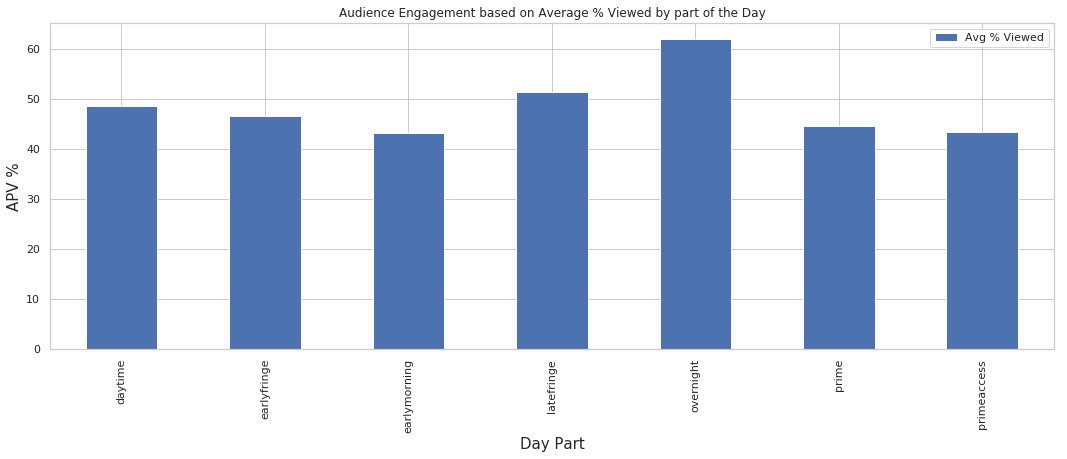

In [341]:
plt.rc("figure", figsize=(18, 6))
temp = df[['daypart','Avg % Viewed']].groupby(['daypart']).mean()
temp.plot(kind='bar',stacked=True,title="Audience Engagement based on Average % Viewed by part of the Day",legend=True)
plt.xlabel('Day Part',size=15)
plt.ylabel('APV %',size=15)
plt.show()

### From the above graph it is clear that late night shows have larger audience engagement more than 60%, implying our audience are more involved at night time. 
### The engagement %  increases from prime access, prime and significantly for an overnight period. This signifies people get more involved in watching TV later in the day. Generally working people tend to watch TV after coming home from work. The number of households tuning in also increases drastically from prime access to prime.
### But later for the overnight period it there is a huge drop in the number of the households tuned in, having high average viewed percent.
### Although audient engagement is almost 50% during the daytime, if the client chose to show ads during that time this there is a high chance that the viewers may have tuned in the show but not really involved in seeing it, the reason could be any distraction resulting into low retention. Measuring a device activity is different from the person's actual behavior.
### Therefore, it's not possible to rely on it because of the lack of viewing behavior data and demographic data of the people.
### With passive viewing behavior data and demographic info we can segment the audience as per the media strategies.
### A high level of participation/active involvement is another surefire sign of audience engagement. The more stimulated and involved the attendees are the better retention of ads or success rate for other media strategies implementations.

### Average Count of Unique Households recorded by part of the Day

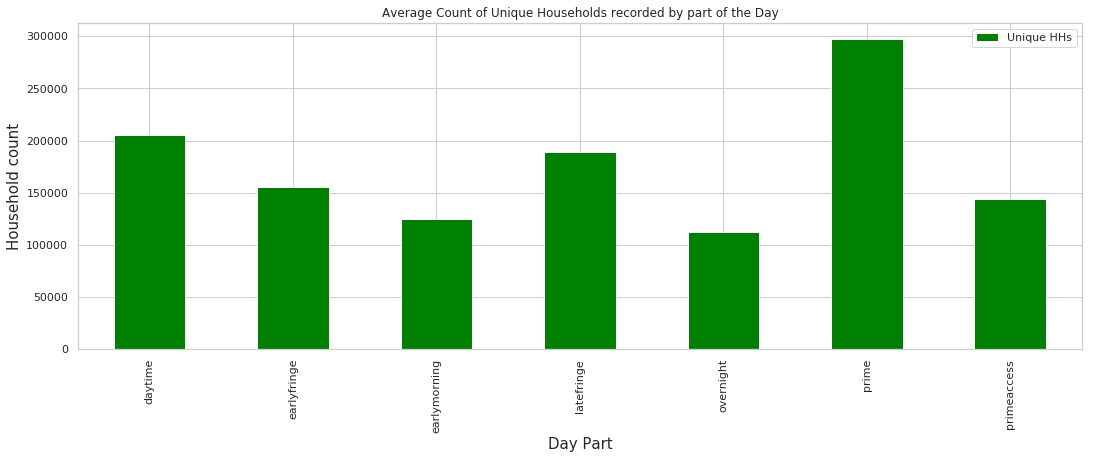

In [342]:
plt.rc("figure", figsize=(18, 6))
tt = df[['daypart','Unique HHs']].groupby(['daypart']).mean()
tt.plot(kind='bar',stacked=True,title="Average Count of Unique Households recorded by part of the Day",\
        legend=True,color =['green'])
plt.xlabel('Day Part',size=15)
plt.ylabel('Household count',size=15)
plt.show()

### Average Count of Households for Type of TV network used in different part of the Day

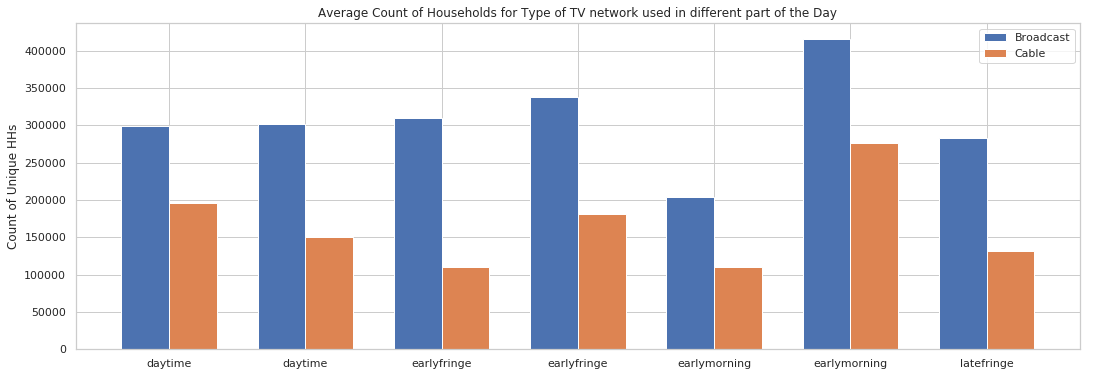

In [343]:
t = df[['Type','daypart','Unique HHs']].groupby(['daypart','Type']).mean().reset_index()
t1= t[t['Type']=='Broadcast']
t2= t[t['Type']=='Cable']

N= t2.shape[0]
ind = np.arange(N)
width = 0.35  
plt.bar(ind, t1['Unique HHs'], width, label='Broadcast')
plt.bar(ind+width, t2['Unique HHs'], width, label='Cable')
plt.ylabel('Count of Unique HHs')
plt.title('Average Count of Households for Type of TV network used in different part of the Day')
plt.xticks(ind + width / 2, t['daypart'])
plt.legend(loc='best')
plt.show()

### The number of households tuning in via Broadcast network for all parts of the day is significantly way higher than that of the Cable. This indicates the viewers have a higher inclination towards the Broadcast type over Cable irrespective of the time of the day.

### The huge difference is mainly because of huge gap in the number of series offered between the type of network shown below:

In [344]:
df[['series','Type']].groupby(['Type']).count().reset_index()

,Type,series
0,Broadcast,198
1,Cable,2769


### APV for Type of TV network used in different part of the Day

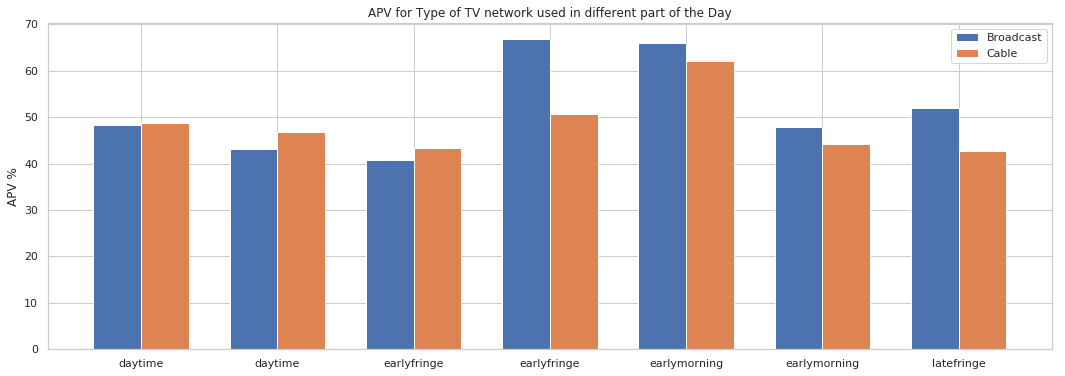

In [345]:
t = df[['Type','daypart','Avg % Viewed']].groupby(['daypart','Type']).mean().reset_index()
t1= t[t['Type']=='Broadcast']
t2= t[t['Type']=='Cable']

N= t2.shape[0]
ind = np.arange(N)
width = 0.35  
plt.bar(ind, t1['Avg % Viewed'], width, label='Broadcast')
plt.bar(ind+width, t2['Avg % Viewed'], width, label='Cable')
plt.ylabel('APV %')
plt.title('APV for Type of TV network used in different part of the Day')
plt.xticks(ind + width / 2, t['daypart'])
plt.legend(loc='best')
plt.show()

network6, network32, netowrk30 and network26 each provide a huge variety of series(more than 270)


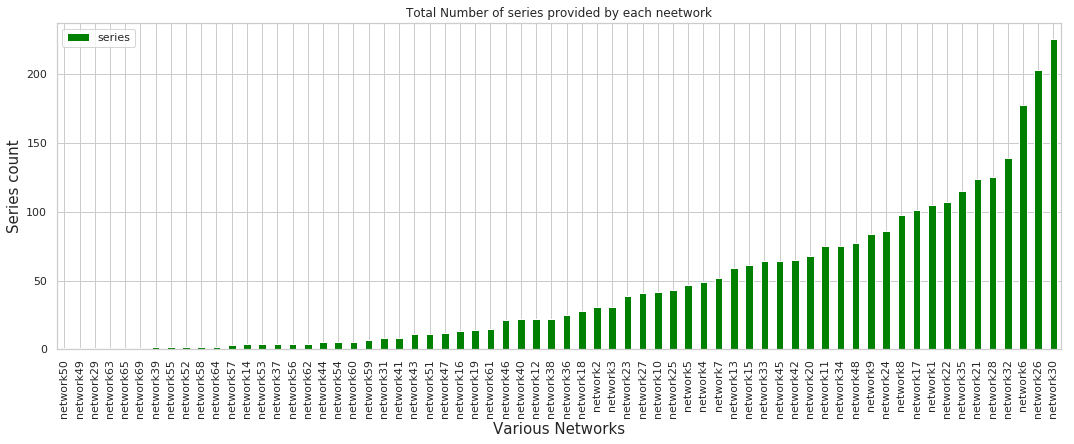

In [346]:
plt.rc("figure", figsize=(18, 6))
p = df[['network','series']].groupby(['network']).count().sort_values(by='series')
p.plot(kind='bar',stacked=True,title="Total Number of series provided by each neetwork",\
        legend=True,color =['green'])
plt.xlabel('Various Networks',size=15)
plt.ylabel('Series count',size=15)

print("network6, network32, netowrk30 and network26 each provide a huge variety of series(more than 270)")
plt.show()

The graph is self-explanatory


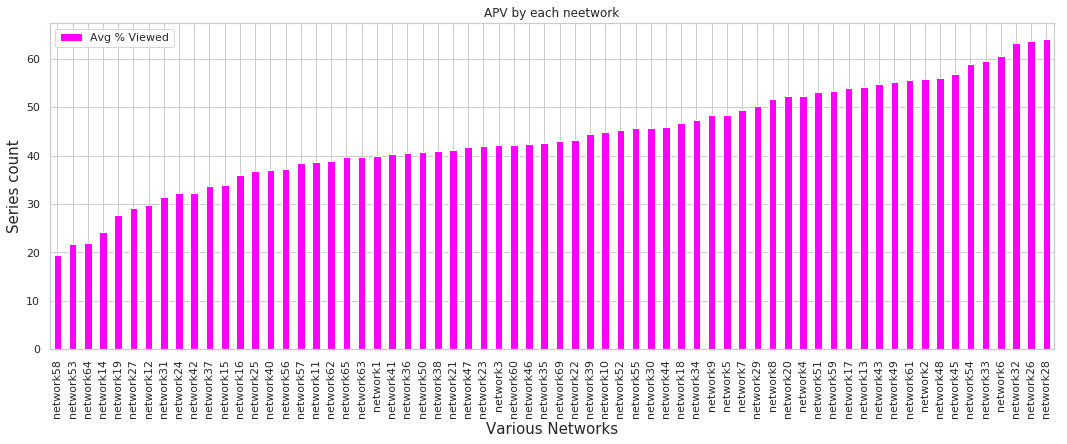

In [347]:
plt.rc("figure", figsize=(18, 6))
p = df[['network','Avg % Viewed']].groupby(['network']).mean().sort_values(by='Avg % Viewed')
p.plot(kind='bar',stacked=True,title="APV by each neetwork",\
        legend=True,color =['Magenta'])
plt.xlabel('Various Networks',size=15)
plt.ylabel('Series count',size=15)

print("The graph is self-explanatory")
plt.show()
# df[['network','Avg % Viewed']].groupby(['network']).mean().sort_values(by='network')

# ------------------------------ENGAGEMENT INDEX------------------------------------

Engagement index, which would have the value of 1 for a program that performs exactly average, and is more or less than 1 commensurate with the program's APV

Method: Grouping by series and finding the average APV for a series and diving each row of APV for that seriesby the average value of APV

In [377]:
#Generate Engagement Index dataframe
s = df[['series','Avg % Viewed']].groupby(['series']).apply(lambda x: x/x.mean()).rename\
(columns={'Avg % Viewed':'Engagement_Index'})

# Concatenating the generated Engagement Index dataframe to original dataframe
df = pd.concat([df, s], axis=1)

# Data preview
df.head(3)

,series,network,Type,# Eps,Air Day,National Time,Run_time (min),daypart,Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagemet_Index,Time,Engagement_Index
24,series55,network5,Broadcast,1,M,7:30 PM,30,primeaccess,502575,159801.821111,60.500399,1.0,7-8 PM,1.0
25,series830,network13,Broadcast,1,M,7:30 PM,30,primeaccess,450308,156285.249167,66.182741,1.0,7-8 PM,1.0
34,series838,network4,Broadcast,1,T,10:00 PM,60,prime,546704,281768.449444,47.447029,1.0,10-11 PM,1.0


### Statistics for 'Engagemet_Index'

In [378]:
df['Engagement_Index'].describe()

count    2967.000000
mean        1.000000
std         0.110576
min         0.498121
25%         0.960948
50%         1.000000
75%         1.030165
max         1.610127
Name: Engagement_Index, dtype: float64

### Plotting pairplot
Pair plot is used to understand the best set of features to explain a relationship between two variables.

<Figure size 2880x2880 with 0 Axes>

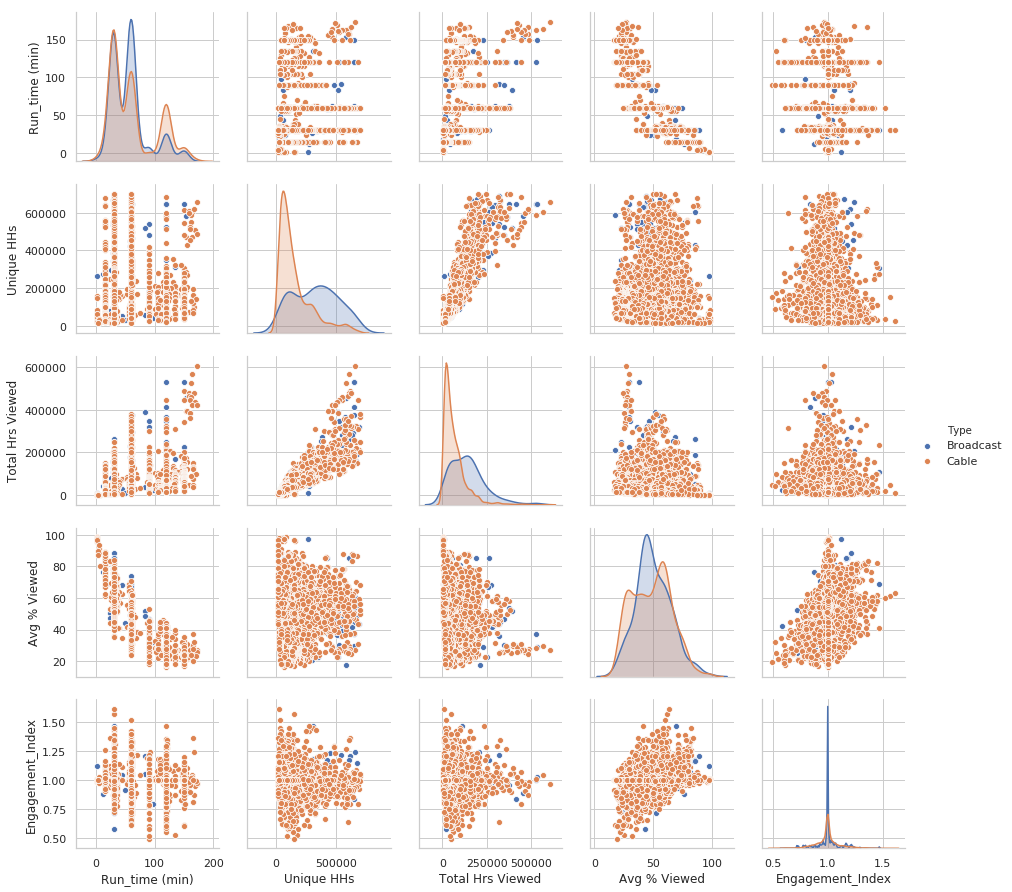

In [379]:
plt.figure(figsize=(40, 40))
sns.pairplot(df[['daypart','Type','Run_time (min)','Unique HHs','Total Hrs Viewed','Avg % Viewed'\
                 ,"Engagement_Index"]], hue='Type');

### The above graphs indicate relationship between different pair of columns.
#### * We can infer that the Run_time and APV have high negative correlation.(row1 column4)
    
#### * Looking at last row first graph, the points are scattered all over - we can say that there is no significant relationship between 'Engagement_Index' and "Run_time (min)"
#### * The graph at row 3 column 2 indicated there is high positive correlation between 'Total Hrs Viewed ' and 'Unique HHs'
   

### Pearon correlation values 

In [380]:
s = df[['daypart','Type','Run_time (min)','Unique HHs','Total Hrs Viewed','Avg % Viewed',"Engagement_Index"]]
corr = s.corr(method='pearson')
corr

,Run_time (min),Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagement_Index
Run_time (min),1.000000,-0.123799,0.193804,-0.844714,-0.093656
Unique HHs,-0.123799,1.000000,0.870878,0.115088,-0.073802
Total Hrs Viewed,0.193804,0.870878,1.000000,-0.106383,-0.030520
Avg % Viewed,-0.844714,0.115088,-0.106383,1.000000,0.321846
Engagement_Index,-0.093656,-0.073802,-0.030520,0.321846,1.000000


#### In above table, the pearson coefficient for 'Engagement_Index' and "Run_time" is -0.098332 which a very close value to zero indication no association between them

In [381]:
#Data Manipulation
# Generating new columns based on existing required for visualisations

df['Time']=df['National Time'].apply(lambda x:x.split(" ")[0].split(":")[0]+"-"+str(int(x.split(" ")[0].split(":")[0])+1)\
                                     +" "+x.split(" ")[1])
df.head(3)

,series,network,Type,# Eps,Air Day,National Time,Run_time (min),daypart,Unique HHs,Total Hrs Viewed,Avg % Viewed,Engagemet_Index,Time,Engagement_Index
24,series55,network5,Broadcast,1,M,7:30 PM,30,primeaccess,502575,159801.821111,60.500399,1.0,7-8 PM,1.0
25,series830,network13,Broadcast,1,M,7:30 PM,30,primeaccess,450308,156285.249167,66.182741,1.0,7-8 PM,1.0
34,series838,network4,Broadcast,1,T,10:00 PM,60,prime,546704,281768.449444,47.447029,1.0,10-11 PM,1.0


### Detailed Engagement_Index vaues by hour

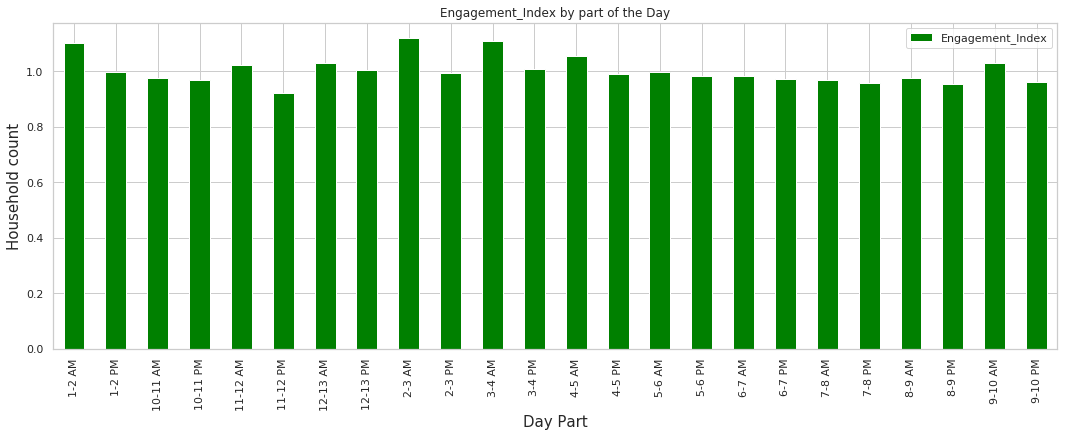

In [382]:
s = df[['Time','Engagement_Index']].groupby(['Time']).mean()
plt.rc("figure", figsize=(18, 6))
s.plot(kind='bar',stacked=True,title="Engagement_Index by part of the Day",\
        legend=True,color =['green'])
plt.xlabel('Day Part',size=15)
plt.ylabel('Household count',size=15)
plt.show()

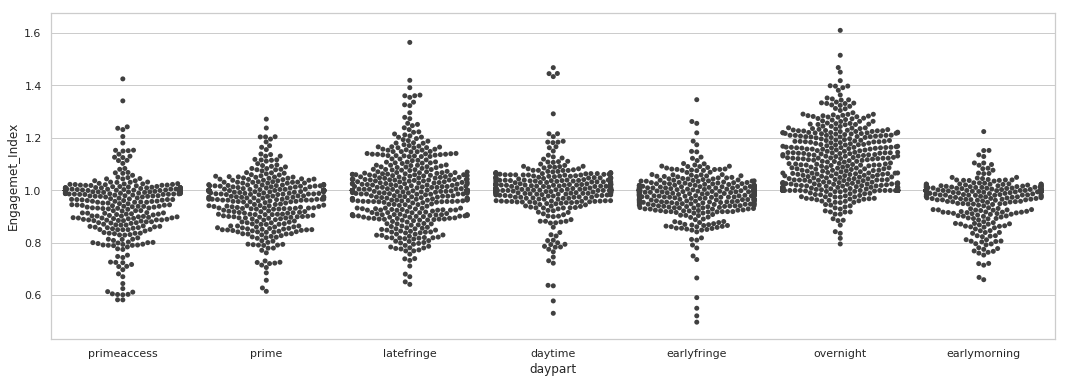

In [383]:
ax = sns.swarmplot(x="daypart", y="Engagemet_Index", data=df, color=".25")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


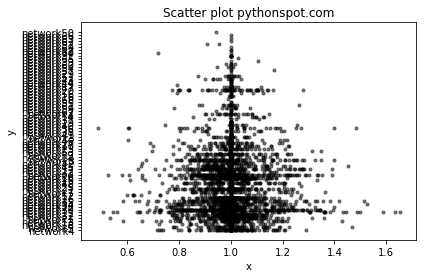

In [31]:
plt.scatter(df['Engagemet_Index'], df['network'], s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


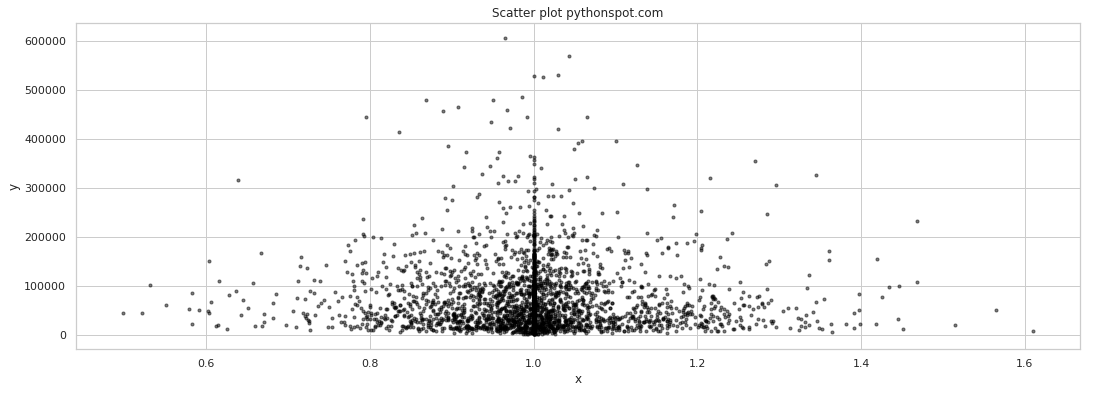

In [384]:
plt.scatter(df['Engagement_Index'], df['Total Hrs Viewed'], s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### As per the data provided to determine the extent engagement could be determined by the following:

### People's viewing behavior data: Tuneing in to a show doesn't guarantee wheather the person is actually watching TV
### Feedback data : Ratings or review for the series
### A Digital GRP is a unit of measurement that represents the percentage of online viewers reached within a total targeted audience population multiplied by the number of times they were reached. The digital GRP has the potential to serve as an organizing principle combining traditional with digital into the same playing field.
### Viewer demographic infomation 
### Type of Advanced TV/ Cable details/Device
### Geographic details, day and week analysis

In [386]:
df[['Type','Engagement_Index']].groupby(['Type']).mean()

,Engagement_Index
Type,
Broadcast,1.003795
Cable,0.999729


In [387]:
df[['Type','Engagement_Index']].groupby(['Type']).count()

,Engagement_Index
Type,
Broadcast,198
Cable,2769
